In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


---
# Singular value decomposition
---


In [95]:
A = np.array(np.random.randn(4,5))

In [96]:
# the matrix
A = np.array([[3,0,5],[8,1,3]])

# Note differences from MATLAB: S is vector, V is V'
U,S,V = np.linalg.svd(A)
print(U), print(' ')
print(S), print(' ')
print(V)


[[-0.52138438  0.85332193]
 [-0.85332193 -0.52138438]]
 
[9.89086518 3.18916698]
 
[[-0.84833111 -0.08627374 -0.52238986]
 [-0.50518185 -0.16348607  0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


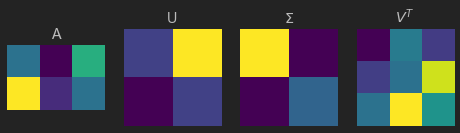

In [97]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()

---
# SVD vs eigendecomposition for square symm M
---

In [98]:
# Determine the relationships btw eigenvectors and singular vectors for sqaure m

# Create a symmetric matrix (5x5)
A = np.random.randn(5,5)
A = A.T@A

# Compute eig (W,L) W - eigvec
L,W = np.linalg.eig(A)

# svd (U,S,V)
U,s,V = np.linalg.svd(A)

# sort eig  outputs
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:,sidx]

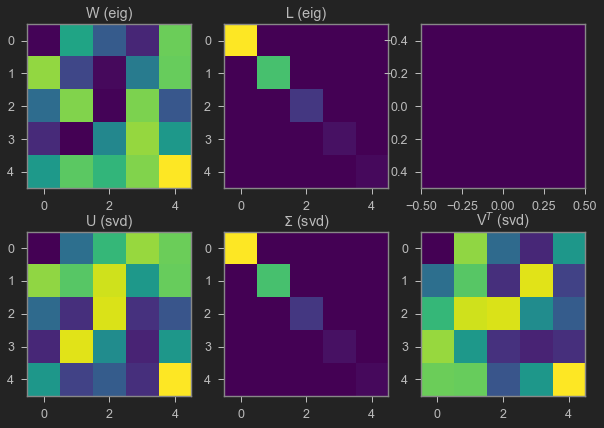

In [85]:
# images of all m

fig, ax = plt.subplots(2,3,figsize = (10,7))
ax[0,0].imshow(W)
ax[0,0].set_title('W (eig)')
ax[0,1].imshow(np.diag(L))
ax[0,1].set_title('L (eig)')
ax[0,2].imshow(np.zeros((1,1)))


ax[1,0].imshow(U)
ax[1,0].set_title('U (svd)')
ax[1,1].imshow(np.diag(s))
ax[1,1].set_title('$\Sigma$ (svd)')
ax[1,2].imshow(V)
ax[1,2].set_title('V$^T$ (svd)')

plt.show()


In [99]:
# compare U and V
print(np.round(U-V.T,4))

[[ 0. -0.  0.  0.  0.]
 [-0.  0. -0. -0. -0.]
 [ 0.  0. -0. -0.  0.]
 [-0. -0.  0.  0. -0.]
 [ 0. -0. -0. -0.  0.]]


In [100]:
# compare U and W
print(np.round(U+W,4))

[[-0.6996 -0.      0.5143  0.      0.    ]
 [-1.478   0.     -0.5378  0.     -0.    ]
 [ 0.3144  0.      1.6113 -0.      0.    ]
 [-0.7779  0.      0.3425  0.     -0.    ]
 [-0.7888 -0.      0.856  -0.      0.    ]]


In [ ]:
# for a square sum m U and V are the same
# U and W are the same (considering sign flipping)

---
# Relation between singular values and eigenvalues
---

In [101]:
# case 1: eig(A'A) vs. svd(A)

A = np.array([ [3,1,0], [1,1,0] ])

print( np.sort(np.linalg.eig(A.T@A)[0]) )
print( np.sort(np.linalg.svd(A)[1])**2 )

# So the eigen val of A.T@A same with svd A squared

[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425]


In [102]:
# case 2: eig(A'A) vs. svd(A'A)

print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A.T@A)[1]))

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


In [103]:
# case 3a: eig(A) vs. svd(A), real-valued eigs

# need a square matrix for eig
A = [ [3,1,0], [1,1,0], [1,1,1]]

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))

[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011]


In [105]:
# case 3b: eig(A) vs. svd(A), complex eigs

# random matrices are likely to give complex eigenvalues
A = np.random.randn(3,3)

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))

[-0.28906239+0.j         -0.27454966-1.32306379j -0.27454966+1.32306379j]
[0.25240742 0.85588164 2.44313166]


---
# SPECTRAL THEORY
---

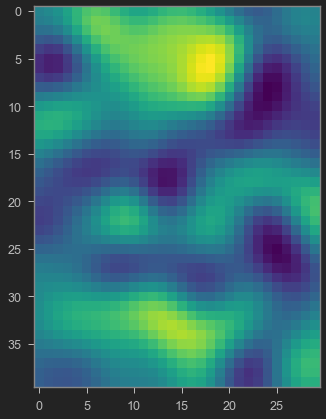

In [6]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()

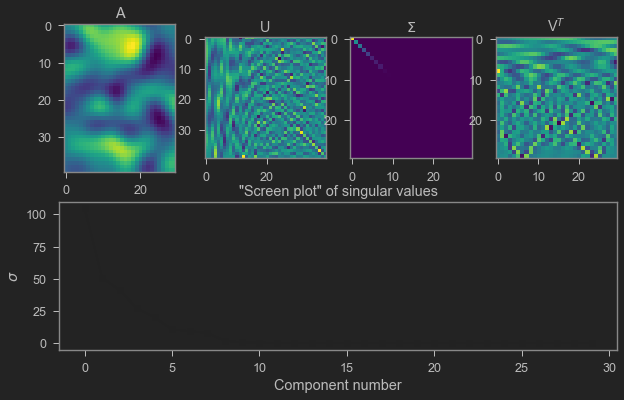

In [7]:
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(10,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Screen plot" of singular values')

plt.show()

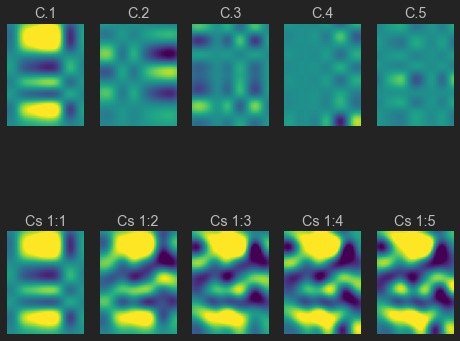

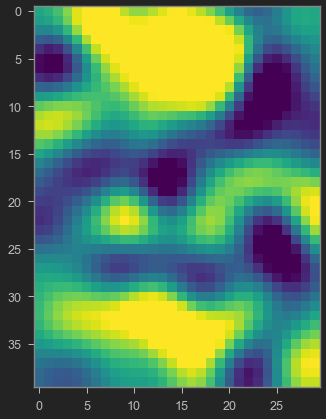

In [8]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()


---
# SVD for low-rank approximations
---


In [11]:
# number of components (singular 'Layers') to keep
nComp =  5

#Reduced matrices
Ur = U[:, 0:nComp]
Sr = S[0:nComp]
Vr = V[0:nComp]

# low-rank approximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print('Rank=', np.linalg.matrix_rank(reconImage))
print('Rank=', np.linalg.matrix_rank(A))


Rank= 5
Rank= 30


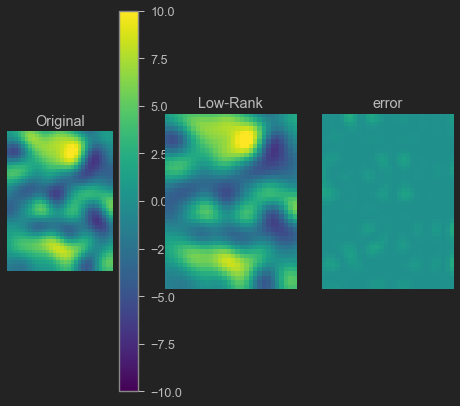

In [17]:
# error map and percent difference from original matrix
errormap = (reconImage-A)**2

#show the results
plt.subplot(131)
plt.imshow(A,vmin=-10,vmax=10)
plt.axis('off')
plt.colorbar()
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage,vmin=-10,vmax=10)
plt.axis('off')
plt.title('Low-Rank')

plt.subplot(133)
plt.imshow(errormap,vmin=-10,vmax=10)
plt.axis('off')
plt.title('error')
plt.show()


---
# Convert singular values to percent variance
---


In [20]:
B = A*2
Ub,Sb,Vb = np.linalg.svd(B)
# Then we see that we did not changed vector V and U, but only S

In [35]:
# Matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smotthing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X*2 + Y**2)/ (k/8))
#Matrix

A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

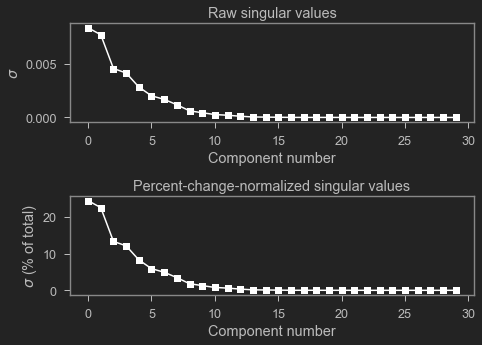

In [41]:
Ascaled = A/121212

# SVD
U,s,V = np.linalg.svd(Ascaled)

# Convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig = plt.subplots(1,figsize=(7,5))

plt.subplot(211)
plt.plot(s,'ks-',color='white')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-',color='white')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()
